1. Test Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

print("Environment OK")


Environment OK


2. Load Dataset

In [2]:
import kagglehub

path = kagglehub.dataset_download(
    "uciml/pima-indians-diabetes-database"
)
print("Dataset path:", path)


Dataset path: C:\Users\maunu\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


3. Load CSV ke DataFrame

In [3]:
import os
import pandas as pd

csv_path = os.path.join(path, "diabetes.csv")
df = pd.read_csv(csv_path)

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


4. Eksplorasi Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


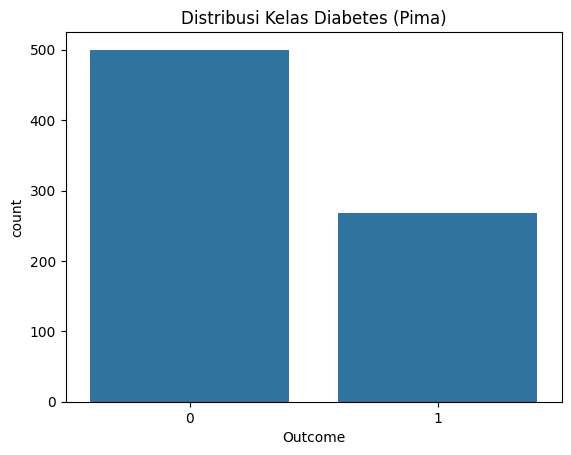

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Outcome", data=df)
plt.title("Distribusi Kelas Diabetes (Pima)")
plt.show()

5. Memisahkan Fitur dan Label

In [10]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (768, 8)
Shape y: (768,)


6. Split Data ke Training dan Testing Set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (614, 8)
Test size: (154, 8)


7. Normalisasi Fitur (StandardScaler)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [13]:
X_train_sc[:5]

array([[-0.85135507, -0.98013068, -0.40478372, -0.55397256, -0.33131928,
        -0.60767846,  0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842,  0.392787  , -0.52639809,
        -0.30213902, -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176,  1.21331196,  0.14244354,
         0.3725939 , -0.76486207, -0.70759409],
       [-0.85135507,  0.7956525 , -0.73109078, -1.31138021, -0.73076636,
        -0.28940821,  0.26231357, -0.36929331],
       [-1.15333775, -0.82157861, -0.29601471,  1.15019465,  0.24462767,
         1.60748245, -0.33762972, -0.96131967]])

9. Import TensorFlow

In [14]:
import tensorflow as tf
print(tf.__version__)

2.20.0


e:\Aunul_Data\Documents\Semester 7\Kelas Praktikum Semester 7\Machine Learning\Demo Program\uap-ml-diabetes-tabular\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


10. Membangun Arsitektur MLP

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation="relu", input_shape=(X_train_sc.shape[1],)),
    Dropout(0.3),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


e:\Aunul_Data\Documents\Semester 7\Kelas Praktikum Semester 7\Machine Learning\Demo Program\uap-ml-diabetes-tabular\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

11. Training Model

In [16]:
history = model.fit(
    X_train_sc, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4399 - loss: 0.7185 - val_accuracy: 0.5285 - val_loss: 0.6775
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4969 - loss: 0.6894 - val_accuracy: 0.7317 - val_loss: 0.6428
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6253 - loss: 0.6693 - val_accuracy: 0.7724 - val_loss: 0.6126
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7067 - loss: 0.6325 - val_accuracy: 0.7805 - val_loss: 0.5841
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7169 - loss: 0.6072 - val_accuracy: 0.7886 - val_loss: 0.5533
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7434 - loss: 0.5760 - val_accuracy: 0.7886 - val_loss: 0.5235
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7189 - loss: 0.5611 - val_accuracy: 0.7805 - val_loss: 0.5000
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7373 - loss: 0.5481 - val_accuracy: 0.7724 - val_loss

12. Grafik Loss dan Accuracy

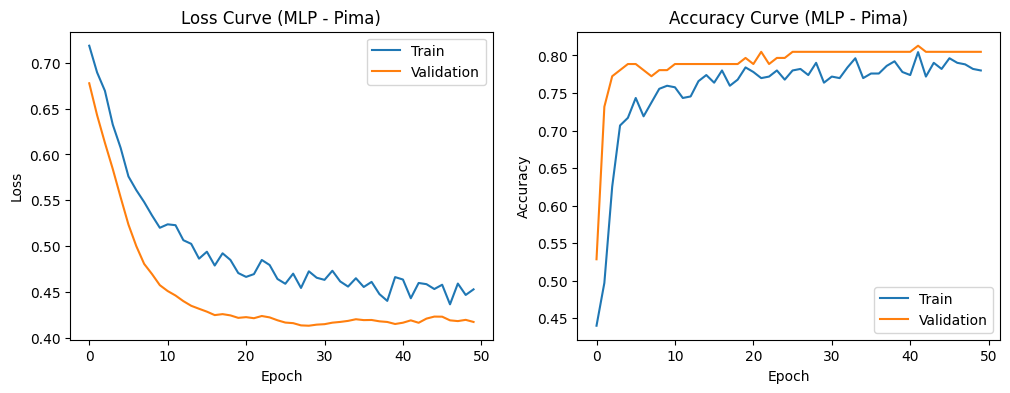

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Loss Curve (MLP - Pima)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Accuracy Curve (MLP - Pima)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

13. Evaluasi Model

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = (model.predict(X_test_sc) > 0.5).astype(int)

print("Classification Report (Pima - MLP)")
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Classification Report (Pima - MLP)
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       100
           1       0.66      0.57      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.75      0.74       154



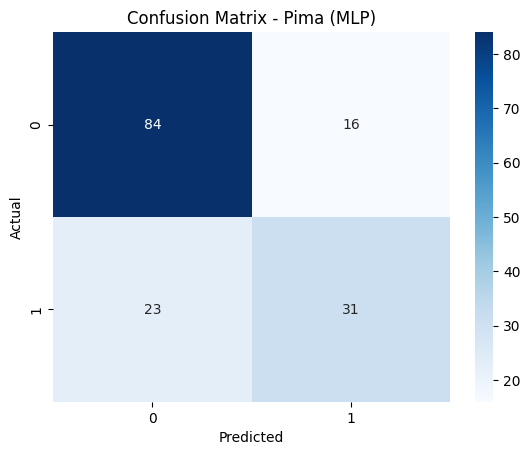

In [19]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Pima (MLP)")
plt.show()